In [23]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5, style='darkgrid')
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
# load utils
import pathlib
pd.set_option('display.max.columns', 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Carga de archivos de los resultados, los resultados estan desagregados.

In [24]:
path = pathlib.Path("data/scalability") 
results = pd.DataFrame()
files = []
for i in path.glob('**/*.csv'):
    partial = pd.read_csv(i.absolute())
    one_class =  i.name.split('.csv')[0]
    print(i, one_class)
    partial['one_class'] = one_class
    results = pd.concat([results, partial], ignore_index = True)


data/scalability/boundaries.csv boundaries
data/scalability/one.csv one


In [25]:
results['is_method'] = np.where(results['isMethod'] == 'drop3', results['isMethod'] + '-' + results['one_class'], results['isMethod'] )
results['total_time'] = results.timeLSH + results.timeIS

In [26]:
results[results.isMethod == 'entropy']

,lshMEthod,sizeBucket,ands,ors,imbalance,neigh,subBuckets,distance,isMethod,rate,executors,timeLSH,timeIS,buckets,buckMax,buckMin,buckAvg,reduction,one_class,is_method,total_time
25,hyperplanes,0.1,2,1,True,4,1000,6,entropy,0.10,2,0.050429,3.192241,4.0,10355.0,4136.0,7112.000000,0.015045,boundaries,entropy,3.242670
26,hyperplanes,0.1,2,1,True,4,1000,6,entropy,0.10,2,0.048368,3.116533,4.0,11214.0,3411.0,7094.500000,0.016844,boundaries,entropy,3.164901
27,hyperplanes,0.1,2,1,True,4,1000,6,entropy,0.10,2,0.051551,3.097673,4.0,11107.0,3555.0,7183.500000,0.014826,boundaries,entropy,3.149224
28,hyperplanes,0.1,2,1,True,4,1000,6,entropy,0.10,2,0.041194,3.048316,4.0,11867.0,2881.0,7125.000000,0.018737,boundaries,entropy,3.089510
29,hyperplanes,0.1,2,1,True,4,1000,6,entropy,0.10,2,0.038896,3.245350,4.0,11790.0,2977.0,7113.000000,0.017292,boundaries,entropy,3.284246
30,hyperplanes,0.1,2,1,True,4,1000,6,entropy,0.25,2,0.068812,3.417556,4.0,29220.0,7430.0,17797.750000,0.019890,boundaries,entropy,3.486368
31,hyperplanes,0.1,2,1,True,4,1000,6,entropy,0.25,2,0.049520,3.328059,4.0,29445.0,7205.0,17833.250000,0.016500,boundaries,entropy,3.377579
32,hyperplanes,0.1,2,1,True,4,1000,6,entropy,0.25,2,0.052453,3.335328,4.0,27290.0,8842.0,17862.250000,0.019916,boundaries,entropy,3.387781
33,hyperplanes,0.1,2,1,True,4,1000,6,entropy,0.25,2,0.049319,3.390293,4.0,30784.0,5654.0,17801.250000,0.020982,boundaries,entropy,3.439612
34,hyperplanes,0.1,2,1,True,4,1000,6,entropy,0.25,2,0.052135,3.137090,4.0,28855.0,8575.0,17784.250000,0.018640,boundaries,entropy,3.189226


In [27]:
results.executors.value_counts()

16    750
12    750
6     750
2     184
Name: executors, dtype: int64

In [28]:
results.columns

Index([&#39;lshMEthod&#39;, &#39;sizeBucket&#39;, &#39;ands&#39;, &#39;ors&#39;, &#39;imbalance&#39;, &#39;neigh&#39;,
       &#39;subBuckets&#39;, &#39;distance&#39;, &#39;isMethod&#39;, &#39;rate&#39;, &#39;executors&#39;, &#39;timeLSH&#39;,
       &#39;timeIS&#39;, &#39;buckets&#39;, &#39;buckMax&#39;, &#39;buckMin&#39;, &#39;buckAvg&#39;, &#39;reduction&#39;,
       &#39;one_class&#39;, &#39;is_method&#39;, &#39;total_time&#39;],
      dtype=&#39;object&#39;)

In [29]:
sns.set_palette(sns.color_palette("Paired"))

&lt;matplotlib.colors.ListedColormap at 0x7ffe8796b9e8&gt;

&lt;seaborn.axisgrid.FacetGrid at 0x7ffe6c916198&gt;

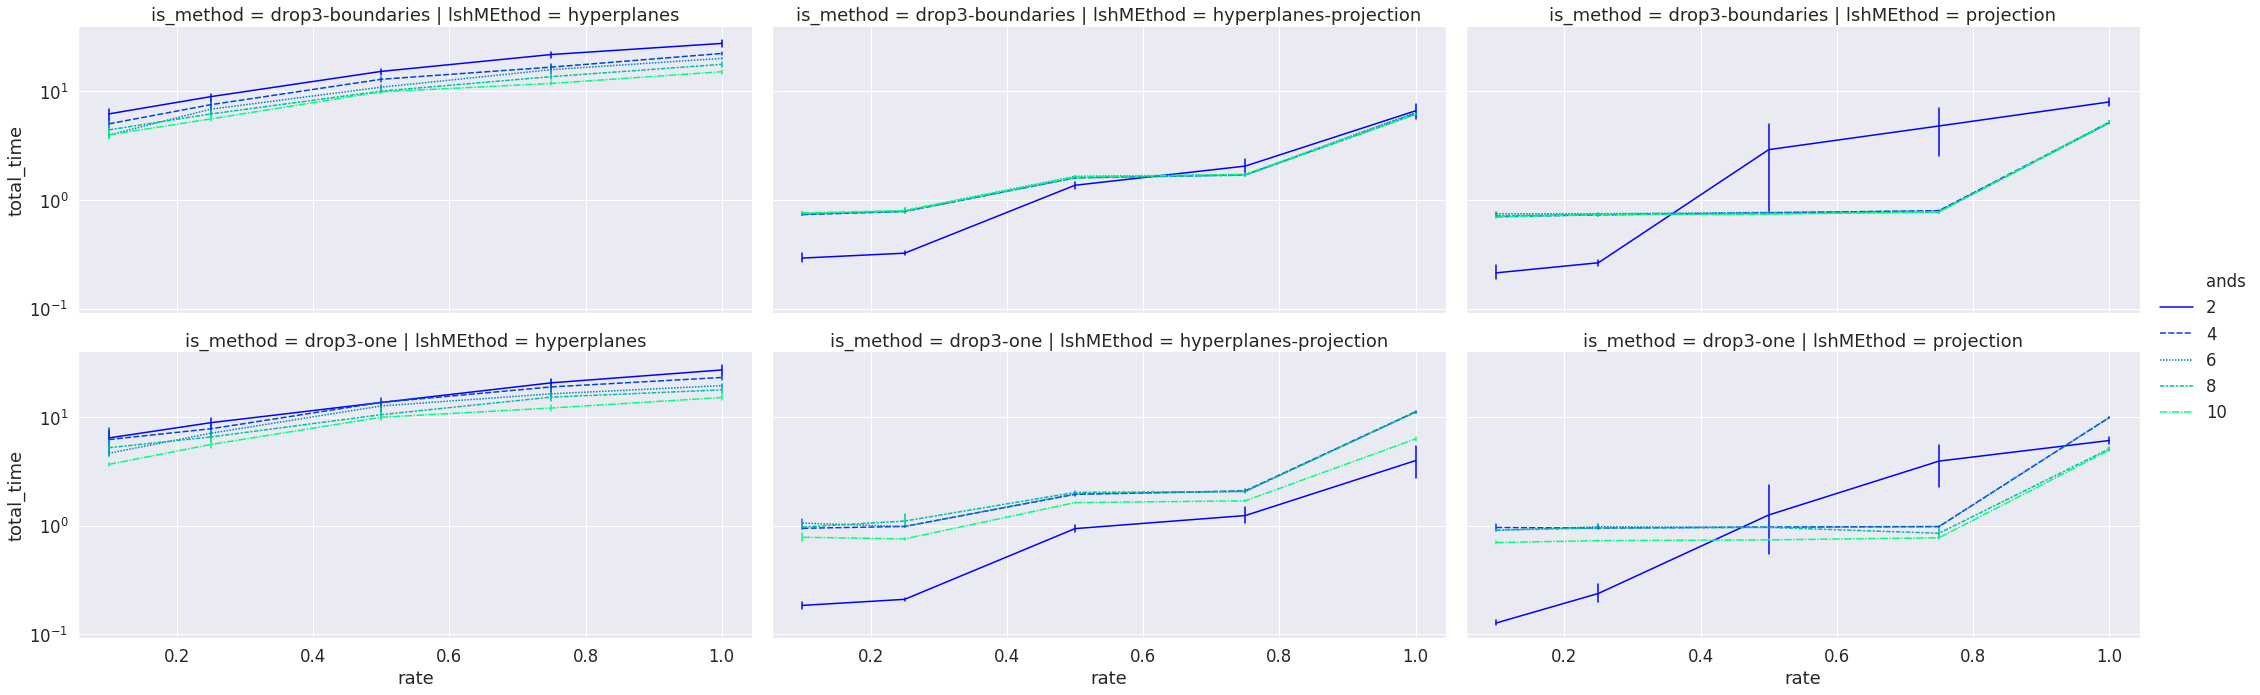

In [30]:
# plot for vertical scalability
g = sns.relplot(data = results[results.executors == 12], 
                x ='rate', 
                y= 'total_time', 
                row = 'is_method', 
                style = 'ands', 
                hue = 'ands', 
                kind = 'line', 
                aspect = 2,
                palette=plt.get_cmap("winter"),
                col = 'lshMEthod',
                facet_kws = {'sharey': 'all'},
                err_style =  'bars',  legend = 'full')
g.set(yscale="log")


&lt;seaborn.axisgrid.FacetGrid at 0x7ffe6b1e3438&gt;

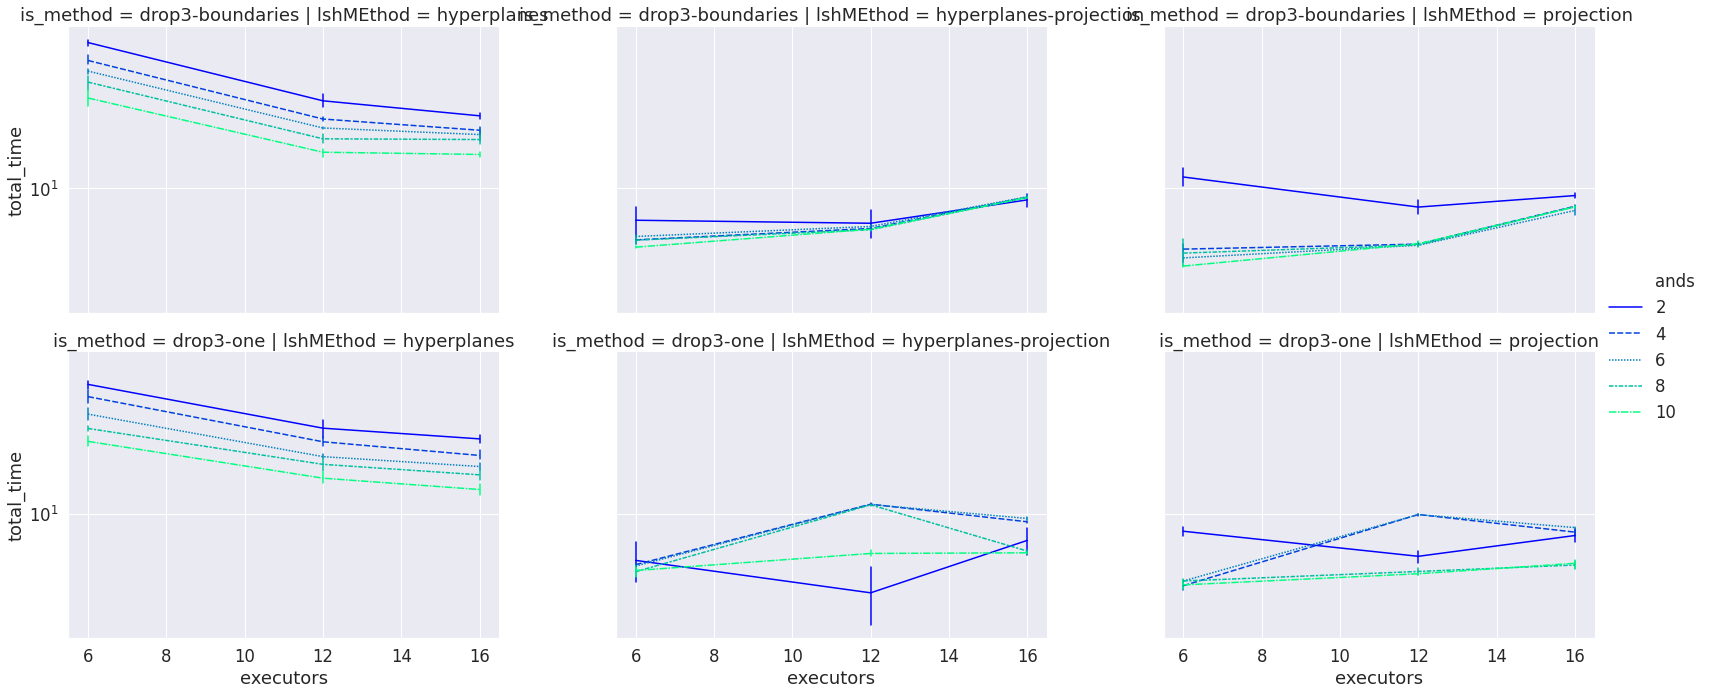

In [31]:
# plot for vertical scalability
g = sns.relplot(data = results[(results.rate == 1.0) & (results.executors>2)], 
                x ='executors', 
                y= 'total_time', 
                col = 'lshMEthod', 
                row = 'is_method', 
                hue = 'ands',
                style = 'ands', 
                kind = 'line', 
                aspect = 1.5,
                facet_kws = {'sharey': 'all'},
                 palette=plt.get_cmap("winter"),
                err_style =  'bars',  legend = 'full')
g.set(yscale="log")
